In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeanseans

In [14]:
im=cv2.imread("C:/Users/chira/Desktop/machine_learning/revision/data/im.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
rows = im.shape[0]
columns = im.shape[1]

print(rows,columns)

1200 1920


(120, 192, 3)


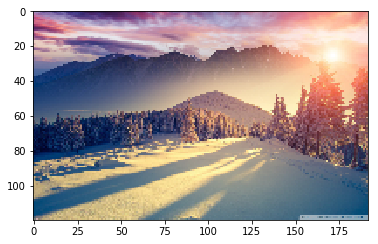

In [22]:
output_rows = 120
im=cv2.resize(im,(int(output_rows*float(columns)/rows),output_rows))
print (im.shape)
plt.imshow(im)

In [29]:
pixels = im.reshape((-1,3))
print(pixels.shape)

(23040, 3)


In [31]:
km = KMeans(n_clusters=10)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
colors = np.asarray(km.cluster_centers_,dtype = 'uint8')
# print(colors)

In [44]:
per = np.asarray(np.unique(km.labels_,return_counts=True)[1],dtype ='float32')
per = per/pixels.shape[0]
per

array([ 0.10412326,  0.14761284,  0.06345486,  0.07994792,  0.14231771,
        0.10147569,  0.04470486,  0.1249566 ,  0.07226562,  0.11914062], dtype=float32)

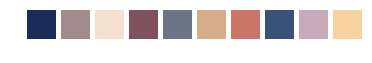

In [56]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20,20,3))
    patch[:,:,:] = 255-colors[ix]
    plt.subplot(1,colors.shape[0],ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [59]:
dom = [[per[ix],colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom,key = lambda z:z[0])


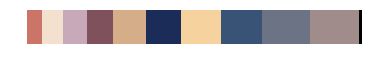

In [65]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

[0.10412326, array([26, 43, 87], dtype=uint8)]